
# **А нужен ли университет?**

В качестве темы для исследоания мною было решено взять установления корелляции между заработной платой программиста и его образованием. Забегая вперед скажу, что сделать это оказалось очень уж легко, поэтому в результате получилось просто исследование зависимости зарплаты программиста от различных факторов

Данные были мною взяты с небезызвестного kaggle.com. Набор данных содержит информацию о более чем 60000 работниках в сфере Computer Science, более конкретно: об уровне их образования, зарплате, опыте, текущем месте работы и многом другом.   

Для начала импортнем всё и загрузим наши данные

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_csv("/content/Levels_Fyi_Salary_Data.csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


Данные крайне обширные: содержат информацию 62642 программистах

In [55]:
len(df.index)

62642

Также они очень свежие

In [56]:
print(df['timestamp'][0])
print(df['timestamp'][62641])

6/7/2017 11:33:27
1/29/2019 5:12:59


Очевидно, для нашего исследования нам не нужно столько информации о респондентах. Оставим только нужные колонки: зарплата, образование, должность, пол, компания. Остальное нас пока не интересует
Также почистим данные: вырежем все строки с Nan в колонке с зарплатой, образованием и полом, в колонке с бонусами заменим Nan на 0

Стоит отметить, что информация о доходе респондента хранится в трех колонках: 'basesalary'  - базовая заработная плата, 'bonus' - что-то вроде премий, и 'totalyearlycompensation' - сумма всего вышеизложенного. Оставим только две последние.

In [57]:
education_salary = df[['Education', 'totalyearlycompensation', 'bonus','gender','title','company']]
education_salary = education_salary[education_salary['Education'].notna()]
education_salary = education_salary[education_salary['gender'].notna()]
education_salary = education_salary[education_salary['totalyearlycompensation'].notna()]
education_salary['bonus'] = education_salary['bonus'].fillna(0)
education_salary.head()

,Education,totalyearlycompensation,bonus,gender,title,company
3427,PhD,125000,4000.0,Male,Data Scientist,Capital One
5037,Master's Degree,170000,18000.0,Male,Software Engineer,Bloomberg
5392,PhD,332000,130000.0,Male,Data Scientist,Amazon
6055,PhD,240000,15000.0,Female,Software Engineer,Apple
7218,PhD,310000,60000.0,Male,Software Engineer,Synopsys


При этом у нас осталось достаточно много данных:

In [58]:
 len(education_salary.index)

27766

Посмотрим, какие вообще бывают варианты ответов в графе 'Education' и сколько в данных соответствующих им ответов


In [59]:
print(education_salary['Education'].value_counts())

Master's Degree      13795
Bachelor's Degree    11875
PhD                   1438
Some College           348
Highschool             310
Name: Education, dtype: int64


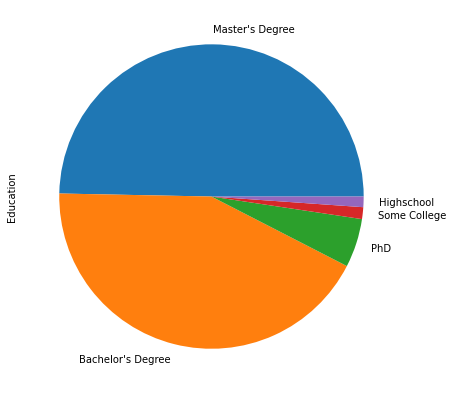

In [60]:
plt.show(education_salary['Education'].value_counts().plot(kind='pie',subplots=True, figsize=(7,7)))

Как видим, заморские компании не любят нанимать себе программистов без высшего образования: респондентов, закончивших только старшую школу, в общей сложности около 1% от всех опрошенных

А как обстоят дела с зарплатой?

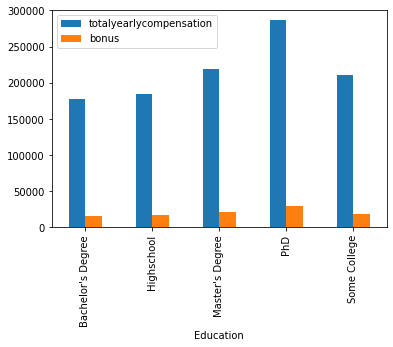

In [61]:
plt.show(education_salary.groupby('Education').mean().plot(kind='bar'))

Здесь есть кое-что интересное. Во-первых, зарплаты программистов без высшего образования почти не отличаются от зарплат программистов, закончивших только бакалавр. Значительное преобладание в зарплате заметно для магистров. А ребята с PhD вообще миллионы рубят

Вспомним, что половина богатств мира принаждлежит 1% его населения. Поэтому считать среднюю зарплату корректно не всегда. Нас также интересует медиана

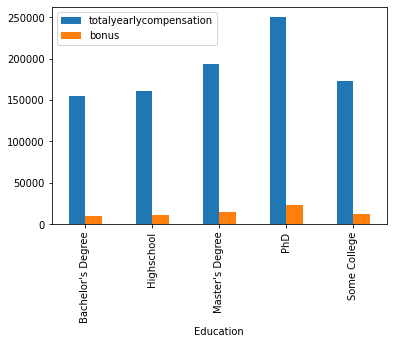

In [62]:
education_salary.groupby('Education').median().plot(kind='bar')

Ситуация примерно та же

Интересно узнать, что же за эти 320 человек без высшего образования (если что, ignoramus это неуч). 

In [63]:
ignoramuses = education_salary[education_salary['Education'] == 'Highschool']
ignoramuses.head()

,Education,totalyearlycompensation,bonus,gender,title,company
23545,Highschool,210000,0.0,Male,Software Engineer,Amazon
23553,Highschool,365000,38000.0,Male,Software Engineer,Twitter
23765,Highschool,214000,67000.0,Male,Software Engineer,Amazon
23777,Highschool,82000,10000.0,Male,Product Designer,BCG Digital Ventures
23844,Highschool,145000,10000.0,Male,Software Engineer,Capital One


Посмотрим, в каких компаниях охотнее всего нанимают неучей.
Для этого посчитаем процент работников без высшего образования для каждой компании отдельно, и возьмем топ 10, так как компаний у нас много:

In [64]:
len(education_salary['company'].unique())

1346

In [65]:
companies = education_salary['company'].value_counts()
ignoramuses_companies = ignoramuses['company'].value_counts()
perc = ignoramuses_companies/companies
perc.dropna(inplace=True)
top_perc = perc.nlargest(n=10)
print(top_perc)

DoctoLib              1.000000
General Mills         1.000000
Juniper Square        1.000000
Amplitude             0.500000
Barracuda Networks    0.500000
Hsbc                  0.500000
InvestCloud           0.500000
MURAL                 0.500000
Telus                 0.500000
Acorns                0.333333
Name: company, dtype: float64


Мы избавились от полей с nan, чтобы исключить компании, в которых вообще не было людей без высшего образования. Но получается, что есть компании, в которых вообще все не имеют высшего образвания? На самом деле, конечно, нет.

In [66]:
[(company, len(education_salary[education_salary['company'] == company])) for company in top_perc.index]

[('DoctoLib', 1),
 ('General Mills', 1),
 ('Juniper Square', 1),
 ('Amplitude', 2),
 ('Barracuda Networks', 2),
 ('Hsbc', 2),
 ('InvestCloud', 2),
 ('MURAL', 6),
 ('Telus', 2),
 ('Acorns', 3)]

Их просто мало

Давайте уберем из рассмотрения все компании, для которых в выборке представлено совсем мало работников

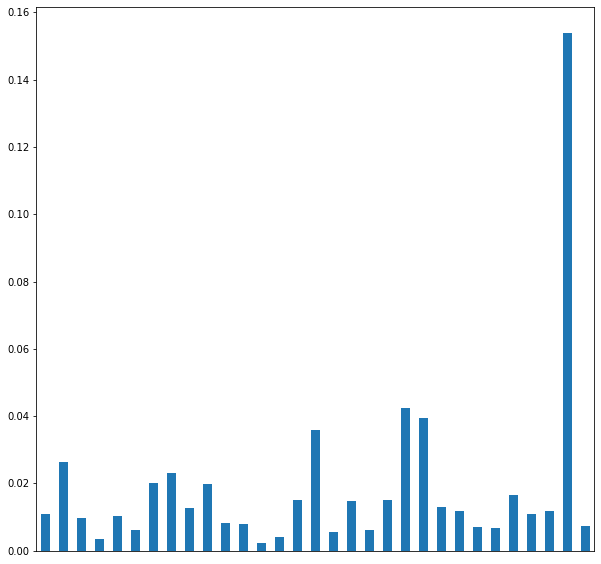

In [67]:
perc = perc[perc.index.isin(companies[companies.values > 75].index)]
plt.show(perc.plot(kind='bar', figsize=(10,10), xticks=[]))

Как думаете, кто лидер?

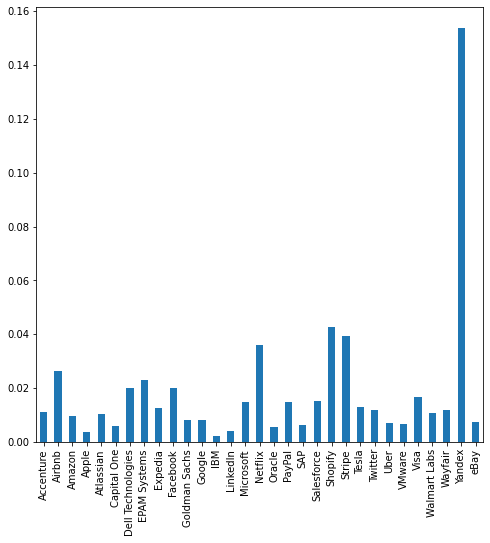

In [68]:
perc = perc[perc.index.isin(companies[companies.values > 75].index)]
plt.show(perc.plot(kind='bar', figsize=(8,8)))

Давайте узнаем, на какие позиции чаще всего берут без вышки. Куда податься, так сказать

In [69]:
len(education_salary['title'].unique())

15

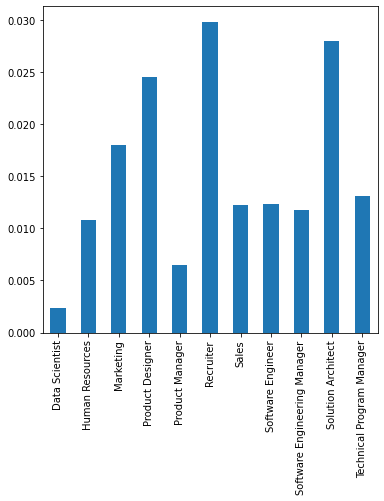

In [70]:
titles = education_salary['title'].value_counts()
ignoramuses_titles = ignoramuses['title'].value_counts()
title_perc = ignoramuses_titles/titles
title_perc.dropna(inplace=True)
plt.show(title_perc.plot(kind='bar', figsize=(6,6)))

В общем, проще всего устроиться на работу без вышки в Гугл рекрутером.
А сложнее всего Дана Сайентистом

Ладно, с образованием разобрались, отчисляемся. А посмотрим как обстоит дело с гендерным балансом

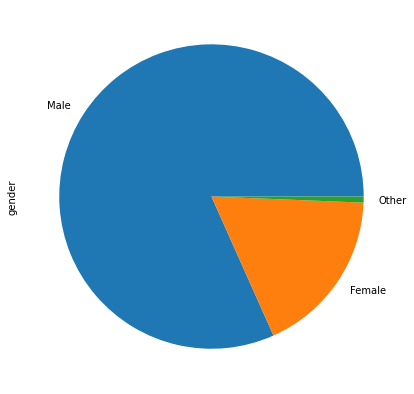

In [71]:
x = education_salary['gender'].value_counts()
plt.show(x.plot.pie(figsize=(7,7)))

Ну, в общем, что и ожидалось, женщин в IT  сильно меньше. Ничего. Исправим
Посмотрим, дискриминирует ли сама сфера женщин. Проанализируем зарплату в соответствии с гендером

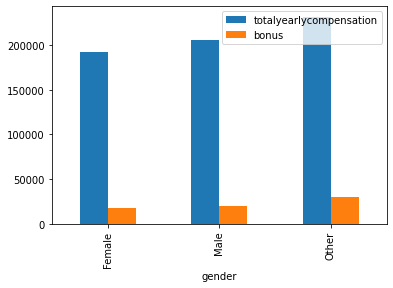

In [72]:
plt.show(education_salary.groupby('gender').mean().plot(kind='bar'))

Получается, что женщины зарабатывают чуть меньше мужчин, а больше всех зарабатывает третий гендер

Возьмем теперь медиану

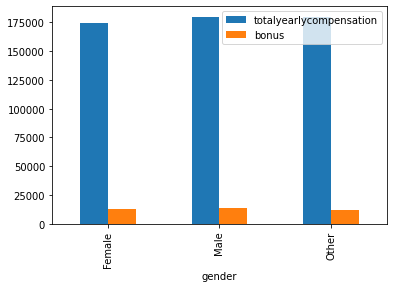

In [73]:
plt.show(education_salary.groupby('gender').median().plot(kind='bar'))

Вау. Зарплаты мужчин и третьего гендера почти одинаковы, а у женщин лишь чутка меньше. Значит, наши данные распределены неравномерно: где-то затесалась группка очень богатых трансгендеров. Посмотрим на распределение данных

Для построения симпатичной картинки воспользуемся средствами seaborn. Потому что так красивее

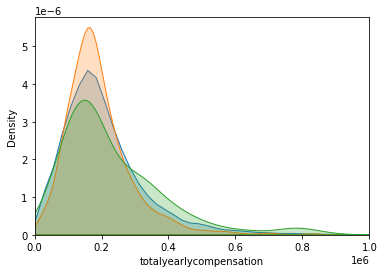

In [74]:
import seaborn as sns

snsplot = sns.kdeplot(education_salary[education_salary['gender'] == 'Male']['totalyearlycompensation'], shade=True)
snsplot = sns.kdeplot(education_salary[education_salary['gender'] == 'Female']['totalyearlycompensation'], shade=True)
snsplot = sns.kdeplot(education_salary[education_salary['gender'] == 'Other']['totalyearlycompensation'], shade=True)
snsplot.set(xlim=(0,1000000))
fig = snsplot.get_figure()

Для наглядной иллюстрации выбросов построим ящик с усами (?)

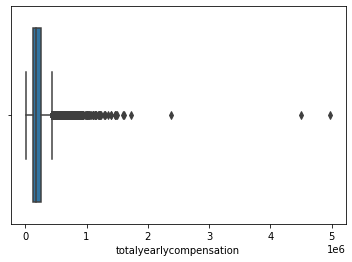

In [75]:
sns.boxplot(x=education_salary['totalyearlycompensation'])
plt.show()

Ну, как мы видим, сплошные выбросы

Посмотрим на эксцесс

In [76]:
education_salary['totalyearlycompensation'].kurtosis()

109.76303017923055

Почистим выбросы используя IQR-rule и построим ящик с усами опять

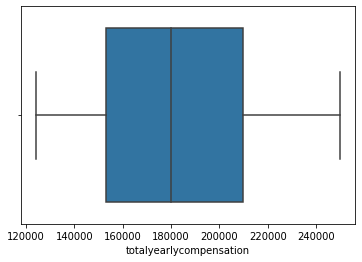

In [77]:
q1 = education_salary['totalyearlycompensation'].quantile(.25)
q3 = education_salary['totalyearlycompensation'].quantile(.75)
mask = education_salary['totalyearlycompensation'].between(q1, q3, inclusive=True)
filtered = education_salary[mask]
sns.boxplot(x=filtered['totalyearlycompensation'])
plt.show()

Как видим, мы ликвидировали выбросы, теперь можно и посмотреть на среднюю зарплату

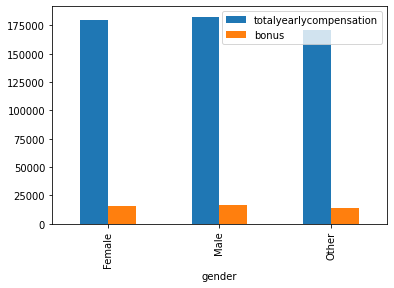

In [78]:
plt.show(filtered.groupby('gender').mean().plot(kind='bar'))

Мы только что победили дискриминацию по гендерному признаку

Вообще, тут ещё можно найти очень много интересных вещей. Но на этом мы остановимся и перейдем к выводам

**Выводы:**


*   Если нет высшего образования надо идти работать в Яндекс
*   Если не хочется в Яндекс можно в Google рекрутером
*   А вот если хочется работать Data Scientistом, образование придется получать
*   Программисты с высшим образованием зарабатывают не сильно больше, чем программисты без него. Если хотите повысить зарплату образованием, придется получать магистрскую или писать  PhD
*   Женщин в IT меньше. Сильно
*   Зарабатывают женщины меньше, но не сильно
